In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('multiple_linear_regression_dataset.csv')
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [3]:
df.shape

(20, 3)

In [4]:
x1, x2, y = np.array(df['age']), np.array(df['experience']), np.array(df['income'])

In [5]:
x1

array([25, 30, 47, 32, 43, 51, 28, 33, 37, 39, 29, 47, 54, 51, 44, 41, 58,
       23, 44, 37], dtype=int64)

In [6]:
# prediction

def pred (x1, x2, m1, m2, c):
    y = m1*x1 + m2*x2 + c
    
    return y

In [7]:
#Cost Funtion
def mse (y_true, y_pred):
    # MSE is the average of the diff between actual value and pred value this is squared
    se = np.mean((y_true - y_pred) ** 2)
    
    return se

In [8]:
# to get the gradient, we find the gradient with respect to slope(dm1), dm2 and intercept(dc)
# dj/dm1 = (-2/n) * sum(x1 * (error)) note: error = y_true - y_pred
# dj/dm2 = (-2/n) * sum(x2 * (error)) note: error = y_true - y_pred
# dj/dc = (-2/n) * sum(error)

def gradient (x1, x2, y, m1, m2, c):
    
    n = x1.size  #size of the data
    y_hat = m1*x1, m2*x2 + c
    error = y - y_hat
    dm1 = (-2.0/n) * np.sum(x1 * error)
    dm2 = (-2.0/n) * np.sum(x2 * error)
    dc = (-2.0/n) * np.sum(error)
    
    return dm1, dm2, dc

In [53]:
lr = 0.0000025  #learning rate
m1 = 0
m2 = 0
c = 0

errors = []
ms1 = []
ms2 = []
cs = []

In [54]:
y_hat = pred(x1, x2, m1, m2, c)  #cal predicted values
error = mse(y, y_hat)  #cal the cost function
grad = gradient(x1, x2, y, m1, m2, c) #cal the gradrient
    
errors.append(error)
ms1.append(m1)
ms2.append(m2)
cs.append(c)
    
#adjust parameters
m1 = m1 - lr * grad[0]
m2 = m2 - lr * grad[1]
c = c - lr * grad[2]

print(f"The Gradient is: dM1 = {grad[0]}, dM2 = {grad[1]} and dC = {grad[2]}")
print(f"The MSE is: {error}, M1 = {m1}, M2 = {m2} and C = {c}")
    
    

The Gradient is: dM1 = -6631808.0, dM2 = -1140428.0 and dC = -162942.0
The MSE is: 1727049635.0, M1 = 16.579520000000002, M2 = 2.8510700000000004 and C = 0.407355


In [55]:
for a in range (100): # a loop to have multiple itirations
    y_hat = pred(x1, x2, m1, m2, c)  #cal predicted values
    error = mse(y, y_hat)  #cal the cost function
    grad = gradient(x1, x2, y, m1, m2, c) #cal the gradrient
    
    errors.append(error)
    ms1.append(m1)
    ms2.append(m2)
    cs.append(c)
    
    #adjust parameters
    m1 = m1 - lr * grad[0]
    m2 = m2 - lr * grad[1]
    c = c - lr * grad[2]
    
    print(f"The MSE is: {error}, M1 = {m1}, M2 = {m2} and C = {c}")
    
    
    

The MSE is: 1670899554.5260952, M1 = 33.01686611473126, M2 = 5.6789666778850005 and C = 0.8113326902150001
The MSE is: 1616187671.7314703, M1 = 49.31325577912912, M2 = 8.483888399413654 and C = 1.2119619918772893
The MSE is: 1562885344.9167273, M1 = 65.4698960033247, M2 = 11.266031831757042 and C = 1.6092715785687357
The MSE is: 1510964456.0477002, M1 = 81.48798346191165, M2 = 14.025591958043549 and C = 2.0032898783413993
The MSE is: 1460397401.5237827, M1 = 97.36870458244863, M2 = 16.762762091779194 and C = 2.3940450758199843
The MSE is: 1411157083.1062608, M1 = 113.11323563320384, M2 = 19.47773389114448 and C = 2.78156511428629
The MSE is: 1363216899.0039039, M1 = 128.72274281014833, M2 = 22.17069737316883 and C = 3.1658776977458105
The MSE is: 1316550735.1131108, M1 = 144.19838232320427, M2 = 24.841840927783625 and C = 3.547010292976642
The MSE is: 1271132956.40995, M1 = 159.54130048175472, M2 = 27.491351331754935 and C = 3.9249901315608406
The MSE is: 1226938398.491489, M1 = 174.75

Error: 112284622.80832605
Gradient: (-2800886.9872821006, -515912.83974593016, -71941.32612243039)
y:[30450 35670 31580 40130 47830 41630 41340 37650 40250 45150 27840 46110
 36720 34800 51300 38900 63600 30870 44190 48700]
y_hat:[28126.56930685 34100.50788045 52877.04352765 36726.21492575
 49986.9455956  58325.23396478 32261.90622134 37645.5157553
 42306.60080626 45129.0841981  32590.87801126 54254.47795347
 61279.9128     57734.90492515 51496.57546479 46967.68585721
 68105.53766295 25894.41495464 50906.24642516 43290.48253899]


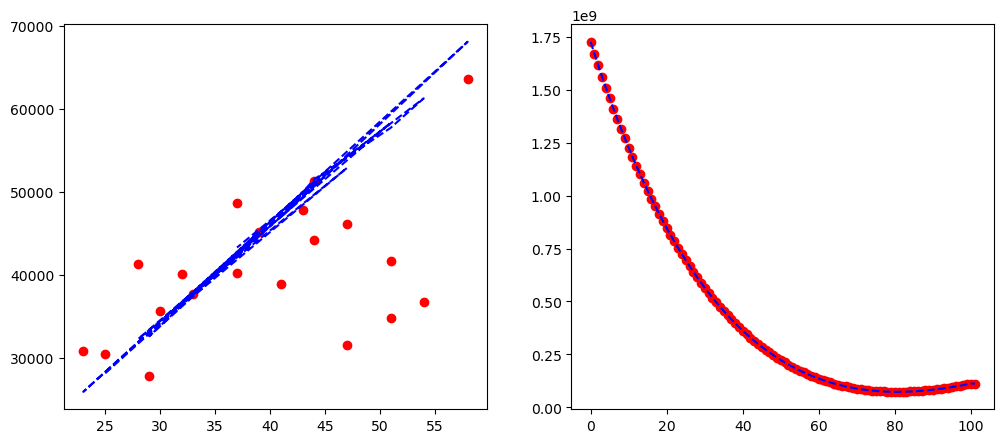

Updated Parameter:
   m1 = 1123.0793935707245
 m2 = 198.0661286446127
  c = 28.0434110546959


In [56]:
#print and plot
print(f"Error: {error}\nGradient: {grad}")
print(f"y:{y}\ny_hat:{y_hat}")


plt.figure(figsize= (12,5))
plt.subplot(1,2,1)
plt.plot(x1, y, "ro")
plt.plot(x1, y_hat, "b--")

plt.subplot(1,2,2)
errors.append(error)
plt.plot(errors, 'ro')
plt.plot(errors, 'b--')

plt.show()

print (f"Updated Parameter:\n   m1 = {m1}\n m2 = {m2}\n  c = {c}")